In [1]:
class HypothesisTest():
    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        "Returns p-value of actual data based on simulated data."
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        "Test statistic for the current test."
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        "Returns a simulated data sample."
        raise UnimplementedMethodException()

In [2]:
import random

In [3]:
random.random()

0.26367687539030094

In [66]:
from math import sin

class PileFaceTest(HypothesisTest):
    "data = [0, 0, 0, 0]"

    def TestStatistic(self, data):
        return sum([sin(x) for x in data]) / len(data) 
    
    def RunModel(self):
        data = []
        for _ in range(len(self.data)):
            x = random.random()
            data.append(x)
        return data

In [67]:
pft = PileFaceTest([0, 0, 0, 0])

In [68]:
pft.RunModel()

[0.1917714179922031,
 0.41156684614997496,
 0.9335259573569674,
 0.10698235419583546]

In [69]:
pft.TestStatistic([0, 0, 1, 0])

0.21036774620197413

In [70]:
pft.actual

0.0

In [83]:
pft.PValue(iters=100000)

1.0

In [84]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [85]:
def plot_test_stat(test, title=""):
    "Plots the test statistic distribution and observed value."
    plt.hist(test.test_stats, bins=30, cumulative=False, normed=True)
    ylim = plt.ylim()
    plt.vlines(test.actual, *ylim, label='observed test stat')
    plt.legend(loc='upper left')
    plt.xlabel('test statistic')
    plt.title(title)

(-0.1, 1)

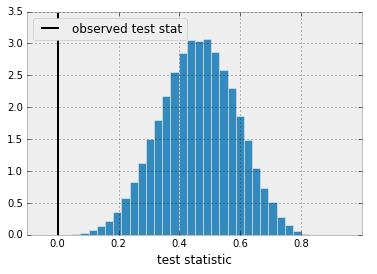

In [86]:
plot_test_stat(pft)
plt.xlim(-0.1, 1)

In [ ]:
pft2 = PileFaceTest()